# Univariate Analysis - dataset1

READING DATA

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold

data = pd.read_csv('dataset1/pd_speech_features_copy1.csv', sep=',')



CONTENT IDENTIFICATION

In [217]:
data.shape  

(756, 755)

In [218]:
num_vars = data.select_dtypes(include='number')
num_vars.columns.size

755

The dataset has 755 variables, and all of them are numeric.

MISSING DATA

In [219]:
null_vars = {}
for var in data:
    nas = data[var].isna().sum()
    if nas > 0:
        null_vars[var] = nas
print(len(null_vars))

0


There are no null values in this dataset.

FEATURE SELECTION
We are dealing with a large dataset, so we need to reduce it in order to better understand it. Features with low-variance will be removed.

In [220]:
selector = VarianceThreshold(data.var().mean())
#selector = VarianceThreshold(data.var().mean())


selector.fit(data)
sel_data = data[data.columns[selector.get_support(indices=True)]]
sel_data.shape

(756, 5)

##### The dataset was reduced to 5 attributes, and this are the features:

In [221]:
sel_data.dtypes

app_entropy_shannon_6_coef     float64
app_entropy_shannon_7_coef     float64
app_entropy_shannon_8_coef     float64
app_entropy_shannon_9_coef     float64
app_entropy_shannon_10_coef      int64
dtype: object

In [222]:
data.dtypes
#data.head()

id                              int64
gender                          int64
PPE                           float64
DFA                           float64
RPDE                          float64
numPulses                       int64
numPeriodsPulses                int64
meanPeriodPulses              float64
stdDevPeriodPulses            float64
locPctJitter                  float64
locAbsJitter                  float64
rapJitter                     float64
ppq5Jitter                    float64
ddpJitter                     float64
locShimmer                    float64
locDbShimmer                  float64
apq3Shimmer                   float64
apq5Shimmer                   float64
apq11Shimmer                  float64
ddaShimmer                    float64
meanAutoCorrHarmonicity       float64
meanNoiseToHarmHarmonicity    float64
meanHarmToNoiseHarmonicity    float64
minIntensity                  float64
maxIntensity                  float64
meanIntensity                 float64
f1          

In [223]:
# gender ()
# Recurrence Period Density Entropy (RPDE)
# Pitch Period Entropy (PPE)
# Detrended Fluctuation Analysis (DFA)
# class (1 has PD)
sel_data = data[['gender','PPE','RPDE','DFA','numPulses','class','meanAutoCorrHarmonicity']]
sel_data

,gender,PPE,RPDE,DFA,numPulses,class,meanAutoCorrHarmonicity
0,1,0.85247,0.57227,0.71826,240,1,0.970805
1,1,0.76686,0.53966,0.69481,234,1,0.984322
2,1,0.85083,0.58982,0.67604,232,1,0.974846
3,0,0.41121,0.59257,0.79672,178,1,0.968343
4,0,0.32790,0.53028,0.79782,236,1,0.975754
5,0,0.50780,0.65451,0.78744,226,1,0.906720
6,1,0.76095,0.54543,0.62145,322,1,0.984564
7,1,0.83671,0.51179,0.62079,318,1,0.987625
8,1,0.80826,0.50447,0.61766,318,1,0.992393
9,0,0.85302,0.54855,0.62247,493,1,0.994504


# Analysis

In [234]:
sel_data.describe(include='all')

,gender,PPE,RPDE,DFA,numPulses,class,meanAutoCorrHarmonicity
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,0.515873,0.746284,0.489058,0.700414,323.972222,0.746032,0.961508
std,0.500079,0.169294,0.137442,0.069718,99.219059,0.435568,0.064095
min,0.000000,0.041551,0.154300,0.543500,2.000000,0.000000,0.589609
25%,0.000000,0.762833,0.386537,0.647053,251.000000,0.000000,0.963341
50%,1.000000,0.809655,0.484355,0.700525,317.000000,1.000000,0.984339
75%,1.000000,0.834315,0.586515,0.754985,384.250000,1.000000,0.992916
max,1.000000,0.907660,0.871230,0.852640,907.000000,1.000000,0.999382


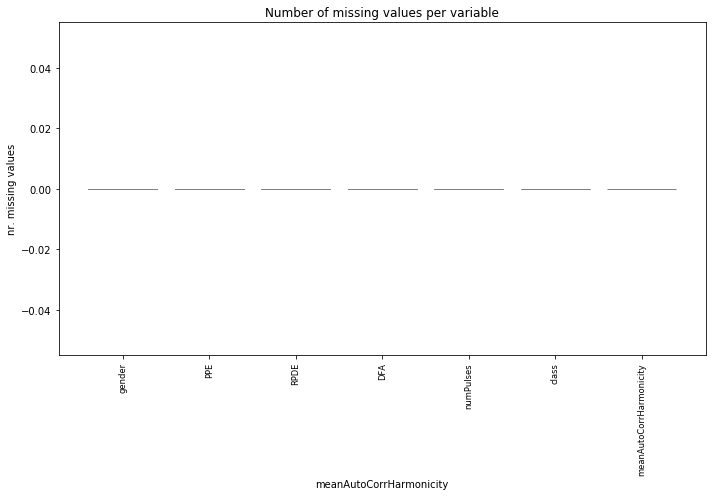

In [224]:
def bar_chart(ax: plt.Axes, xvalues: list, yvalues: list, title: str, xlabel: str, ylabel: str, percentage=False):
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticklabels(xvalues, rotation=90, fontsize='small')
    if percentage:
        ax.set_ylim(0.0, 1.0)
    ax.bar(xvalues, yvalues, edgecolor='grey')
    
fig = plt.figure(figsize=(10,7))
mv = {}
for var in sel_data:
    mv[var] = data[var].isna().sum()
    bar_chart(plt.gca(), mv.keys(), mv.values(), 'Number of missing values per variable', var, 'nr. missing values')
fig.tight_layout()
plt.show()

In [225]:
# Só funciona para as variaveis numericas
sel_data.describe()
## Funciona para todos os tipos de variaveis
#sel_data.describe(include='all')

,gender,PPE,RPDE,DFA,numPulses,class,meanAutoCorrHarmonicity
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,0.515873,0.746284,0.489058,0.700414,323.972222,0.746032,0.961508
std,0.500079,0.169294,0.137442,0.069718,99.219059,0.435568,0.064095
min,0.000000,0.041551,0.154300,0.543500,2.000000,0.000000,0.589609
25%,0.000000,0.762833,0.386537,0.647053,251.000000,0.000000,0.963341
50%,1.000000,0.809655,0.484355,0.700525,317.000000,1.000000,0.984339
75%,1.000000,0.834315,0.586515,0.754985,384.250000,1.000000,0.992916
max,1.000000,0.907660,0.871230,0.852640,907.000000,1.000000,0.999382


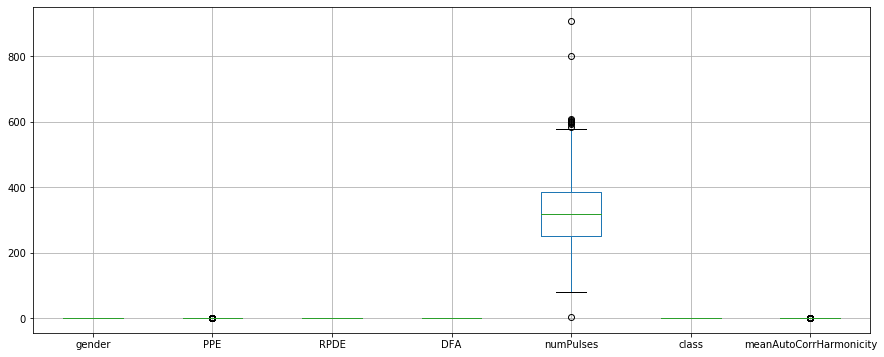

In [226]:
sel_data.boxplot(figsize=(15,6))
plt.show()

<Figure size 432x288 with 0 Axes>

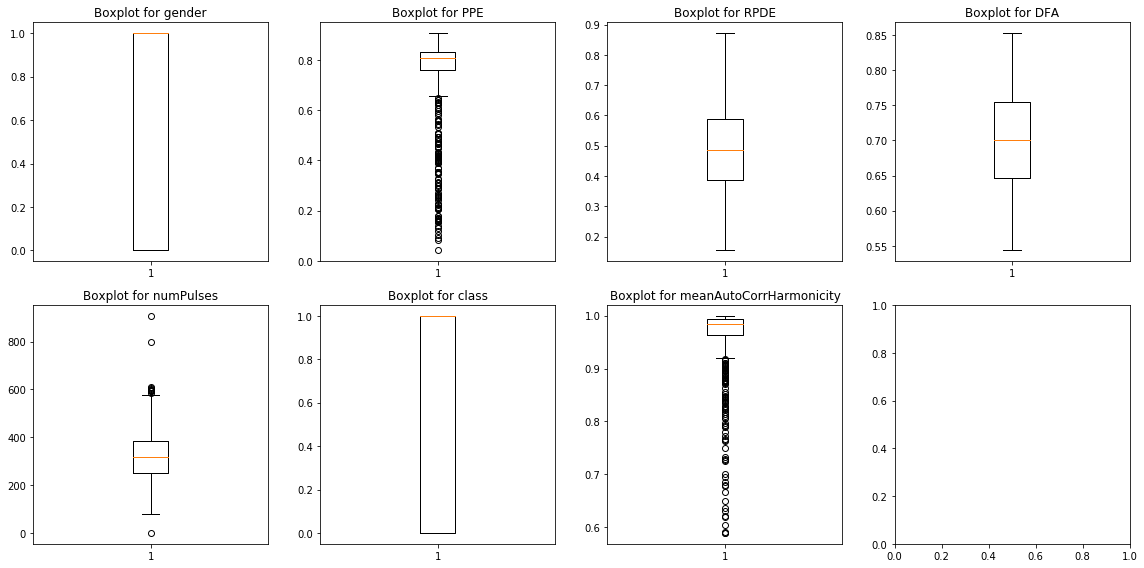

In [227]:
def choose_grid(nr):
    return nr // 4 + 1, 4

columns = sel_data.select_dtypes(include='number').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Boxplot for %s'%columns[n])
    axs[i, j].boxplot(data[columns[n]].dropna().values)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

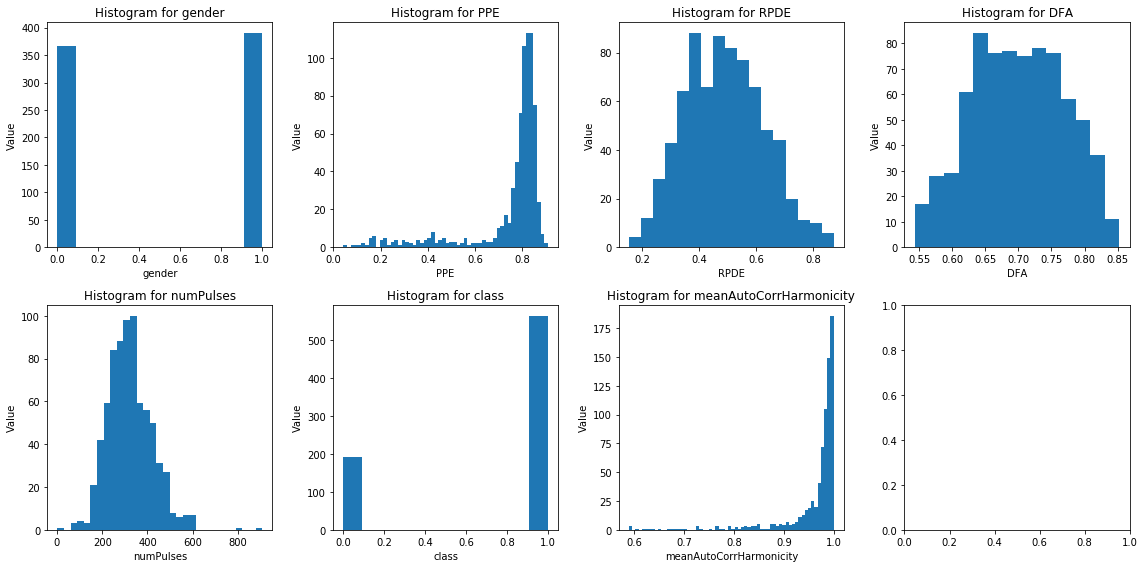

In [228]:
columns = sel_data.select_dtypes(include='number').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Histogram for %s'%columns[n])
    axs[i, j].set_xlabel(columns[n])
    axs[i, j].set_ylabel("Value")
    axs[i, j].hist(data[columns[n]].dropna().values, 'auto')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

#Caso houvesse vars com categorias
columns = sel_data.select_dtypes(include='category').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    counts = data[columns[n]].dropna().value_counts(normalize=True)
    bar_chart(axs[i, j], counts.index, counts.values, 'Histogram for %s'%columns[n], columns[n], 'probability')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

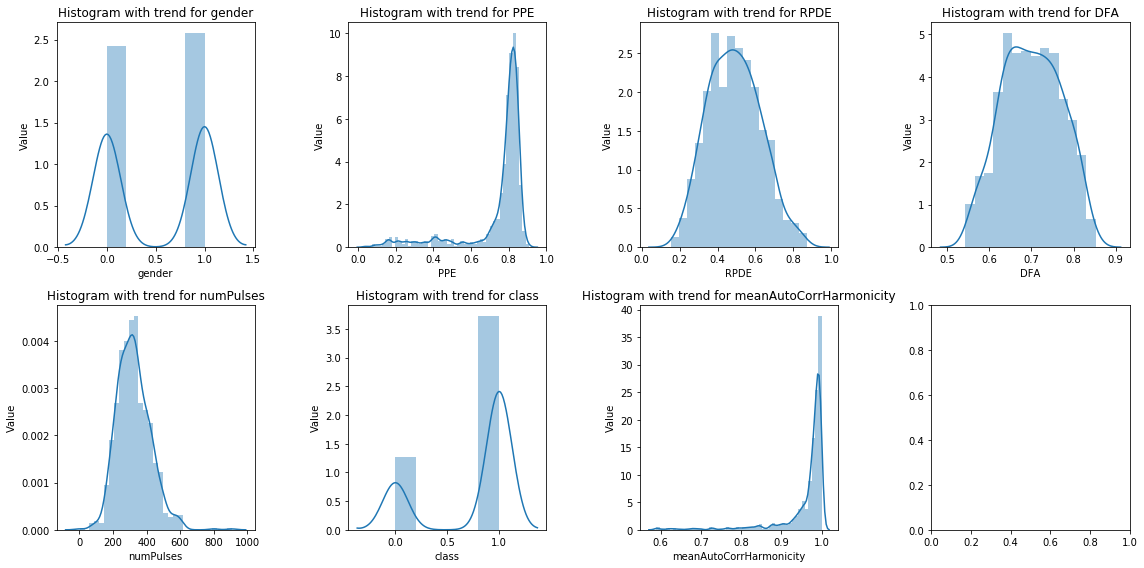

In [229]:
import seaborn as sns

columns = sel_data.select_dtypes(include='number').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Histogram with trend for %s'%columns[n])
    axs[i, j].set_ylabel("Value")
    sns.distplot(data[columns[n]].dropna().values, norm_hist=True, ax=axs[i, j], axlabel=columns[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

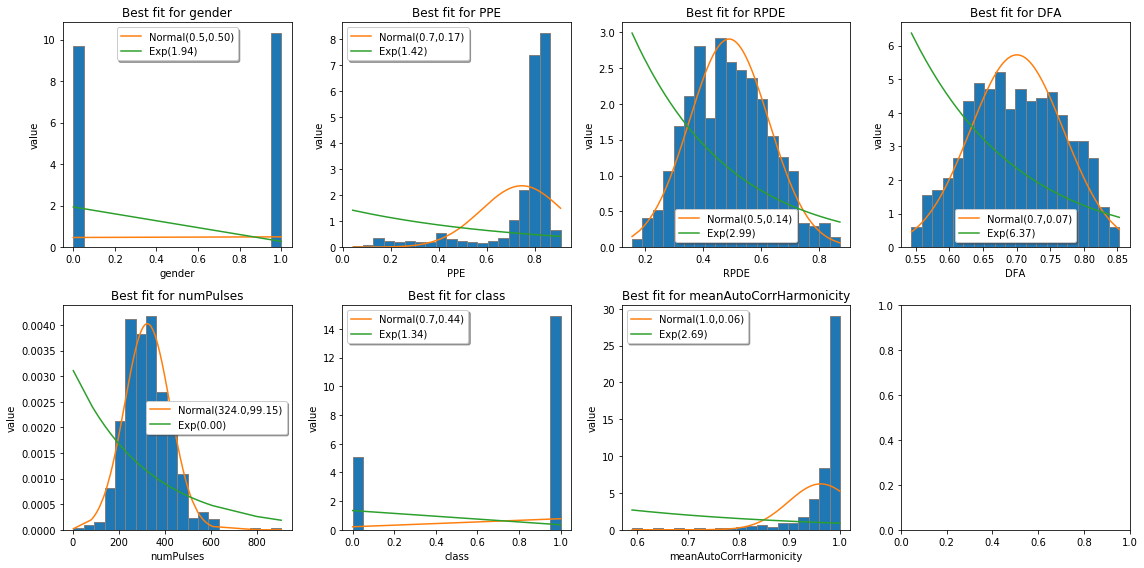

In [230]:
import scipy.stats as _stats 

def multiple_line_chart(ax: plt.Axes, xvalues: list, yvalues: dict, title: str, xlabel: str, ylabel: str, percentage=False):
    legend: list = []
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if percentage:
        ax.set_ylim(0.0, 1.0)

    for name, y in yvalues.items():
        ax.plot(xvalues, y)
        legend.append(name)
    ax.legend(legend, loc='best', fancybox = True, shadow = True) 

def compute_known_distributions(x_values, n_bins) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = _stats.norm.fit(x_values)
    distributions['Normal(%.1f,%.2f)'%(mean,sigma)] = _stats.norm.pdf(x_values, mean, sigma)
    # LogNorm
  #  sigma, loc, scale = _stats.lognorm.fit(x_values)
  #  distributions['LogNor(%.1f,%.2f)'%(np.log(scale),sigma)] = _stats.lognorm.pdf(x_values, sigma, loc, scale)
    # Exponential
    loc, scale = _stats.expon.fit(x_values)
    distributions['Exp(%.2f)'%(1/scale)] = _stats.expon.pdf(x_values, loc, scale)
    # SkewNorm
   # a, loc, scale = _stats.skewnorm.fit(x_values)
   # distributions['SkewNorm(%.2f)'%a] = _stats.skewnorm.pdf(x_values, a, loc, scale) 
    return distributions

def histogram_with_distributions(ax: plt.Axes, series: pd.Series, var: str):
    values = series.sort_values().values
    n, bins, patches = ax.hist(values, 20, density=True, edgecolor='grey')
    distributions = compute_known_distributions(values, bins)
    multiple_line_chart(ax, values, distributions, 'Best fit for %s'%var, var, 'value')

columns = sel_data.select_dtypes(include='number').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    histogram_with_distributions(axs[i, j], data[columns[n]].dropna(), columns[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

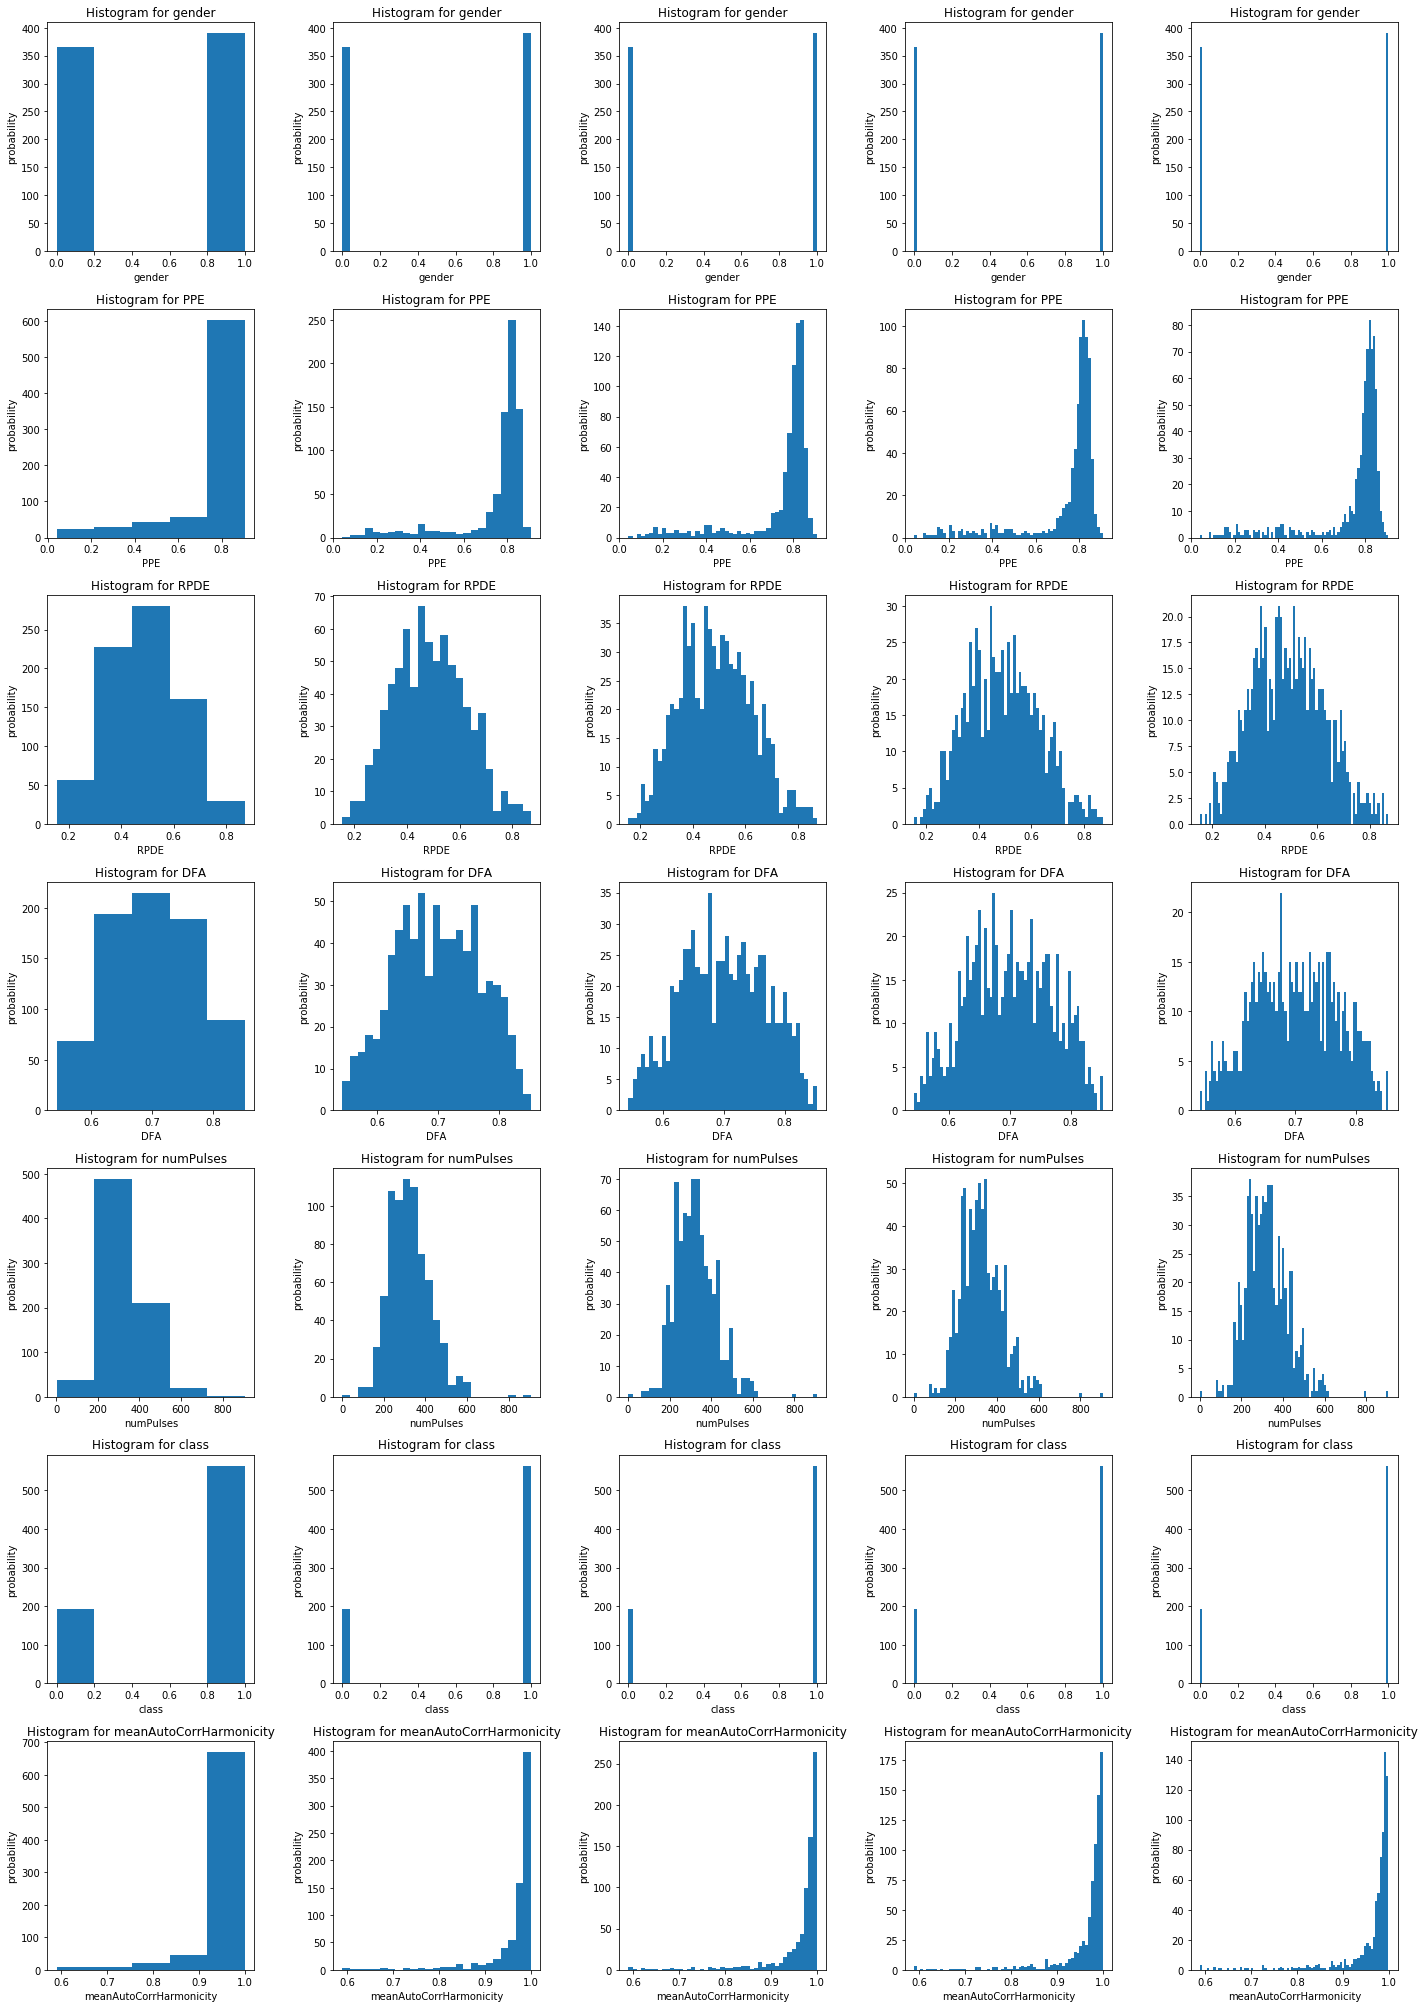

In [231]:
columns = sel_data.select_dtypes(include='number').columns
rows = len(columns)
cols = 5
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
bins = range(5, 100, 20)
for i in range(len(columns)):
    for j in range(len(bins)):
        axs[i, j].set_title('Histogram for %s'%columns[i])
        axs[i, j].set_xlabel(columns[i])
        axs[i, j].set_ylabel("probability")
        axs[i, j].hist(data[columns[i]].dropna().values, bins[j])
fig.tight_layout()
plt.show()

How many instances?

    (756, 755) (data.shape) // 756 instâncias

How many attributes? And for each type?
    
    The dataset was reduced to 4 attributes, and this are the features:

    app_entropy_shannon_7_coef     float64
    app_entropy_shannon_8_coef     float64
    app_entropy_shannon_9_coef     float64
    app_entropy_shannon_10_coef      int64
    dtype: object


Explore its distribution.

What is its type? What is its domain and range? How many missing values? How is its distribution? What about outliers?


<Figure size 432x288 with 0 Axes>

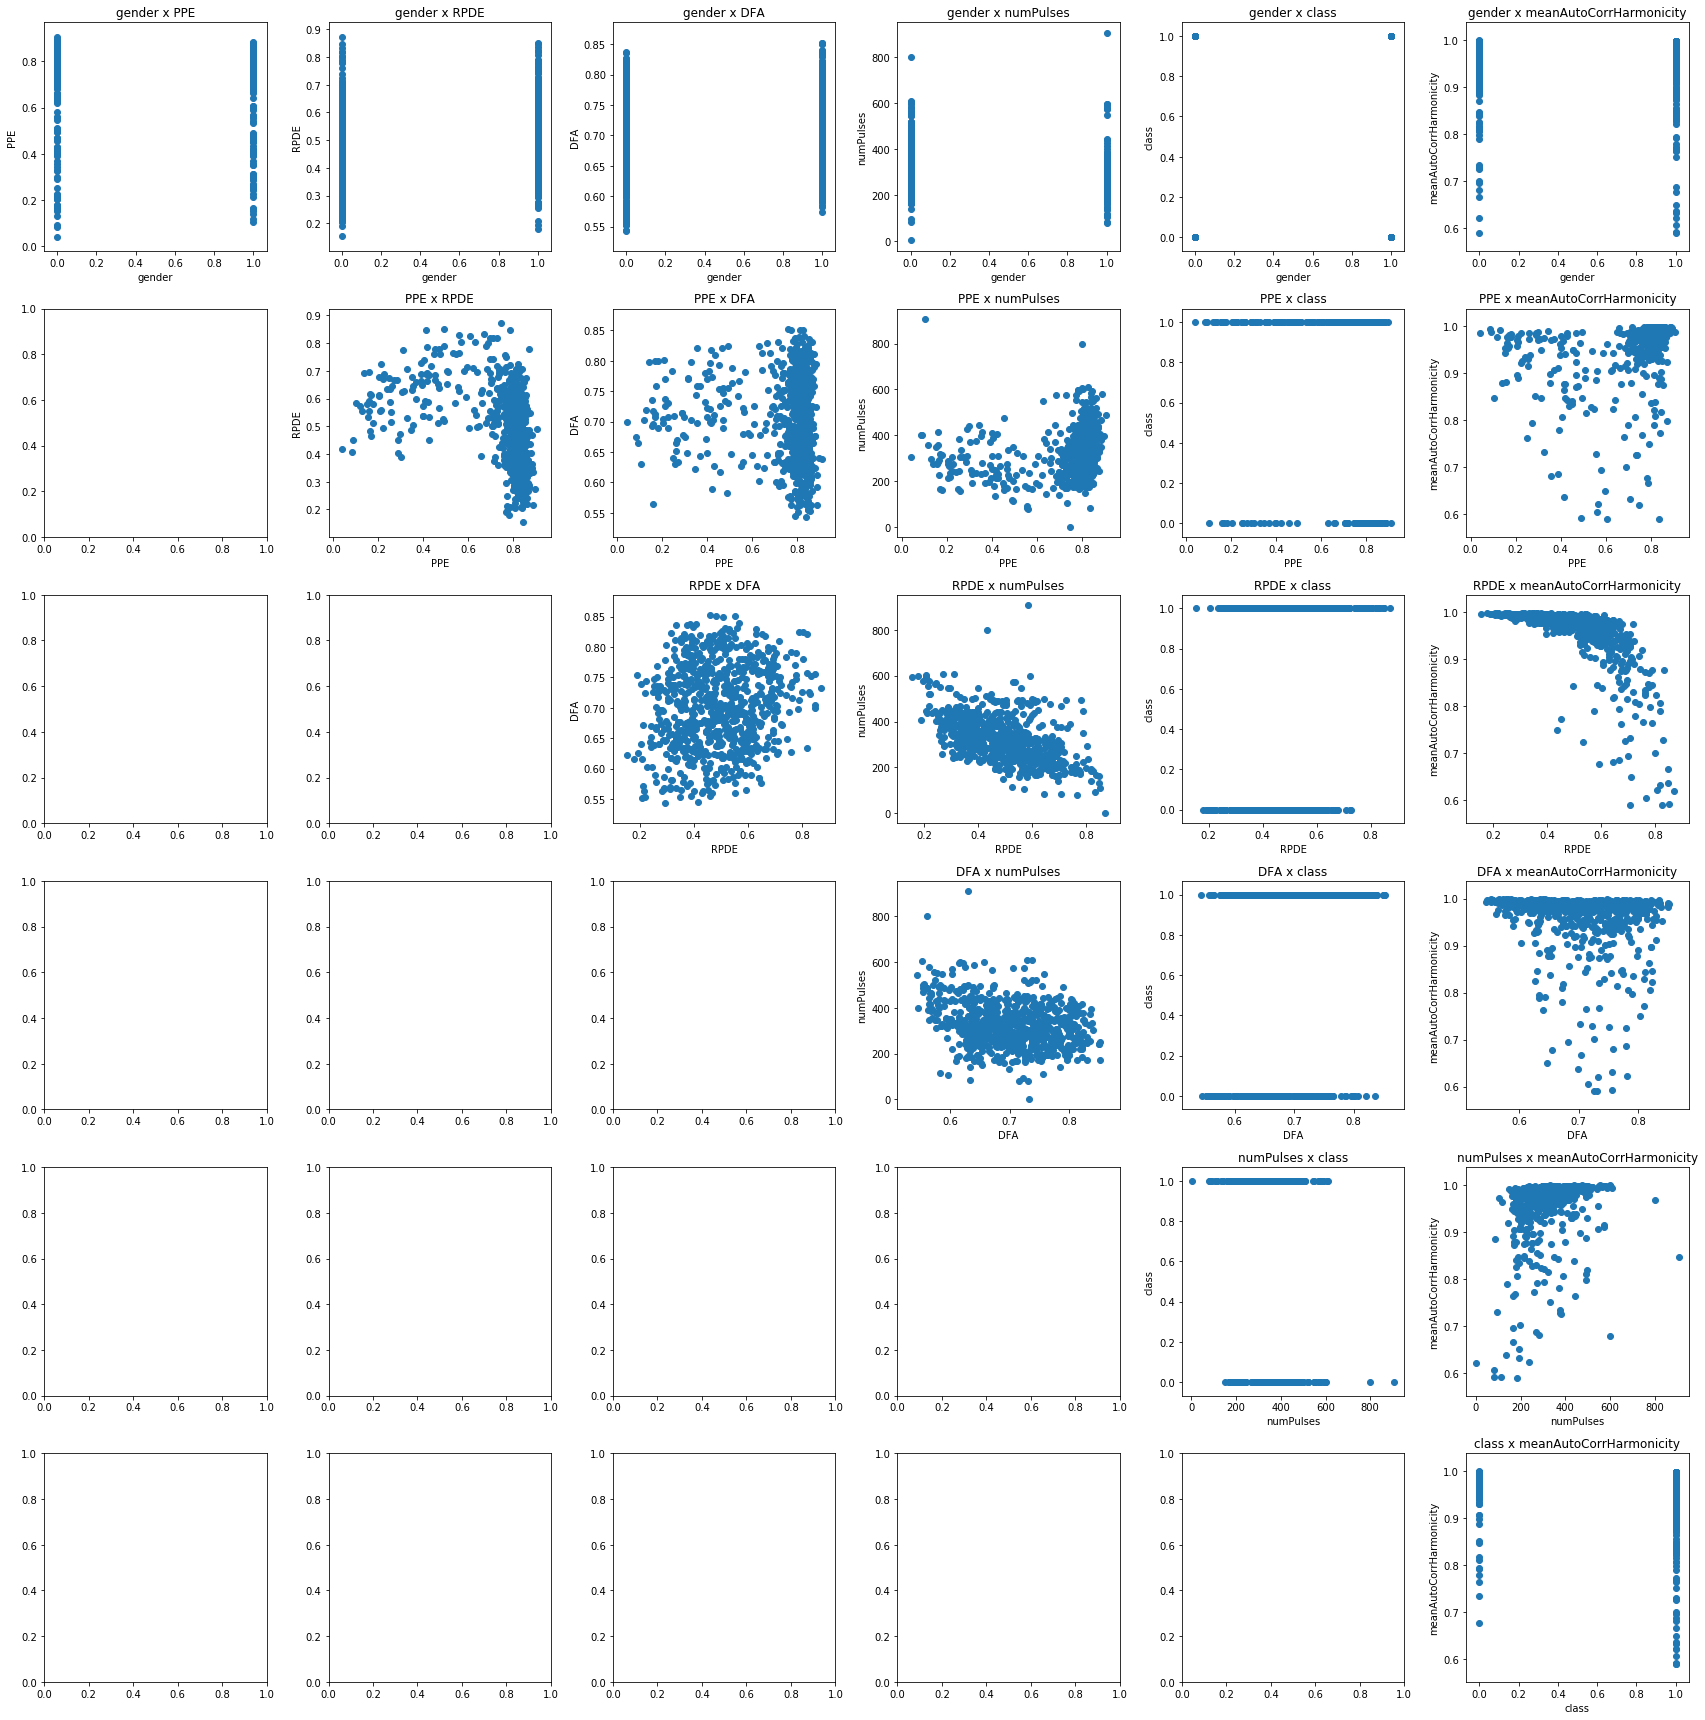

In [232]:
columns = sel_data.select_dtypes(include='number').columns
rows, cols = len(columns)-1, len(columns)-1
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
    for j in range(i+1, len(columns)):
        var2 = columns[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(data[var1], data[var2])
fig.tight_layout()
plt.show()


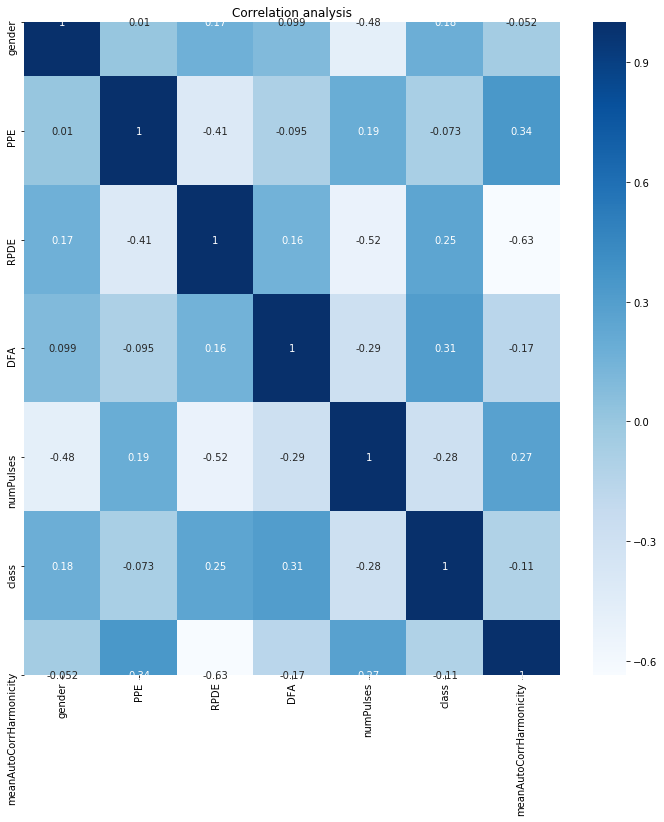

In [233]:
import seaborn as sns

fig = plt.figure(figsize=[12, 12])
corr_mtx = sel_data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()